In [1]:
import pandas as pd
import string

In [2]:
df = pd.read_csv('final_all_names_code.csv')

FileNotFoundError: [Errno 2] No such file or directory: 'final_all_names_code.csv'

In [3]:
df.shape

(404062, 3)

In [4]:
len(df['Country_code'].unique())

78

In [5]:
len(df['Country'].unique())

63

In [6]:
df['Country_code'].value_counts()

en_IE    6212
nl_NL    6206
es_MX    6193
th       6189
ga_IE    6156
         ... 
tl_PH    3425
nl_BE    3412
sk_SK    3325
ko_KR    3178
ta_IN    2992
Name: Country_code, Length: 78, dtype: int64

In [7]:
df['Country'].value_counts()

TH    17326
IN    16573
CA    16497
CH    15719
IE    12368
      ...  
LU     3623
MT     3478
BE     3412
SK     3325
KR     3178
Name: Country, Length: 63, dtype: int64

In [8]:
columns=list(string.ascii_lowercase) + ['Country_code', 'Country']
newdf = pd.DataFrame(columns=columns)

In [9]:
newdf

,a,b,c,d,e,f,g,h,i,j,...,s,t,u,v,w,x,y,z,Country_code,Country


In [10]:
ind = 0
name = df['Name'][ind]

In [11]:
Hash_arrays = []
for ind in range(10000):
    name = df['Name'][ind]
    nameLst = str(name).split(' ')
    lastName = nameLst[-1].lower()
    chars = dict.fromkeys(columns, 0)
    for i in lastName:
        chars[i] = 1
    chars['Country_code'] = df['Country_code'][ind]
    chars['Country'] = df['Country'][ind]
    Hash_arrays.append(chars)                   # storing all the dictionaries into list
auxiliary_df = pd.DataFrame(Hash_arrays)              # converting
newdf = pd.concat([newdf, auxiliary_df], ignore_index=True)   #concatenating


In [12]:
newdf['Country']

0       AE
1       AE
2       AE
3       AE
4       AE
        ..
9995    EG
9996    EG
9997    EG
9998    EG
9999    EG
Name: Country, Length: 10000, dtype: object

In [13]:
newdf.head()

,a,b,c,d,e,f,g,h,i,j,...,t,u,v,w,x,y,z,Country_code,Country,.
0,0,0,0,0,0,0,0,1,0,1,...,0,0,0,0,0,0,0,ar_AE,AE,NaN
1,0,0,0,0,0,0,1,1,1,0,...,1,0,0,1,0,0,0,ar_AE,AE,NaN
2,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,ar_AE,AE,NaN
3,0,1,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,ar_AE,AE,NaN
4,0,0,0,0,1,0,1,0,0,0,...,1,0,0,0,0,1,0,ar_AE,AE,NaN


In [14]:
newdf.columns

Index(['a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j', 'k', 'l', 'm', 'n',
       'o', 'p', 'q', 'r', 's', 't', 'u', 'v', 'w', 'x', 'y', 'z',
       'Country_code', 'Country', '.'],
      dtype='object')

In [15]:
newdf.drop(['.'], axis = 1, inplace = True)

In [16]:
newdf.head()

,a,b,c,d,e,f,g,h,i,j,...,s,t,u,v,w,x,y,z,Country_code,Country
0,0,0,0,0,0,0,0,1,0,1,...,1,0,0,0,0,0,0,0,ar_AE,AE
1,0,0,0,0,0,0,1,1,1,0,...,0,1,0,0,1,0,0,0,ar_AE,AE
2,0,0,0,1,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,ar_AE,AE
3,0,1,0,0,0,0,0,0,1,0,...,1,0,0,0,0,0,0,0,ar_AE,AE
4,0,0,0,0,1,0,1,0,0,0,...,0,1,0,0,0,0,1,0,ar_AE,AE


In [18]:
from sklearn.preprocessing import LabelEncoder

In [19]:
X = newdf[list(string.ascii_lowercase)]
Y = newdf['Country']

In [20]:
X

,a,b,c,d,e,f,g,h,i,j,...,q,r,s,t,u,v,w,x,y,z
0,0,0,0,0,0,0,0,1,0,1,...,0,0,1,0,0,0,0,0,0,0
1,0,0,0,0,0,0,1,1,1,0,...,0,1,0,1,0,0,1,0,0,0
2,0,0,0,1,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
3,0,1,0,0,0,0,0,0,1,0,...,0,1,1,0,0,0,0,0,0,0
4,0,0,0,0,1,0,1,0,0,0,...,0,1,0,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,1,0,0,0,0,0,0,0,1,0,...,0,1,1,0,0,0,0,0,0,0
9996,0,0,0,0,0,0,0,1,0,0,...,0,0,0,1,1,0,0,0,0,0
9997,1,0,0,0,0,0,0,1,1,0,...,0,0,0,1,0,0,0,0,0,0
9998,1,0,1,1,1,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0


In [21]:
Y

0       AE
1       AE
2       AE
3       AE
4       AE
        ..
9995    EG
9996    EG
9997    EG
9998    EG
9999    EG
Name: Country, Length: 10000, dtype: object

In [22]:
le = LabelEncoder()
Y = le.fit_transform(Y)

In [23]:
from sklearn.preprocessing import StandardScaler
X = StandardScaler().fit_transform(X)

In [24]:
X

array([[-0.92593473, -0.36118478, -0.451928  , ..., -0.09476245,
        -0.33370358, -0.30243139],
       [-0.92593473, -0.36118478, -0.451928  , ..., -0.09476245,
        -0.33370358, -0.30243139],
       [-0.92593473, -0.36118478, -0.451928  , ..., -0.09476245,
        -0.33370358, -0.30243139],
       ...,
       [ 1.07998973, -0.36118478, -0.451928  , ..., -0.09476245,
        -0.33370358, -0.30243139],
       [ 1.07998973, -0.36118478,  2.21274183, ..., -0.09476245,
        -0.33370358, -0.30243139],
       [ 1.07998973, -0.36118478, -0.451928  , ..., -0.09476245,
        -0.33370358,  3.30653508]])

In [25]:
newdf['Country'].unique()

array(['AE', 'EG'], dtype=object)

In [26]:
newdf['Country'].value_counts()

AE    5913
EG    4087
Name: Country, dtype: int64

In [27]:
from keras.models import Sequential
from keras.layers import Dense

In [28]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size=0.2, random_state=0) 

In [29]:
from sklearn.neural_network import MLPClassifier

# Create an MLPClassifier with 3 hidden layers
# Specify the number of neurons in each hidden layer
# You can adjust the hidden_layer_sizes parameter to define the structure of the hidden layers
# For example, (100, 50, 30) means three hidden layers with 100, 50 and 30 neurons, respectively
mlp = MLPClassifier(hidden_layer_sizes=(100, 50, 30), activation='relu', solver='adam', random_state=42,verbose=True,
                   learning_rate_init=0.01,n_iter_no_change=30,max_iter=200)

# You can also set other hyperparameters like activation function, solver, etc.

# Fit the model to your training data
mlp.fit(X_train, Y_train)

# Make predictions
Y_pred = mlp.predict(X_test)
from sklearn.metrics import accuracy_score
accuracy_score(Y_test, Y_pred)



Iteration 1, loss = 0.67965596
Iteration 2, loss = 0.67472067
Iteration 3, loss = 0.67197430
Iteration 4, loss = 0.67195900
Iteration 5, loss = 0.66953382
Iteration 6, loss = 0.67071608
Iteration 7, loss = 0.66817739
Iteration 8, loss = 0.66641137
Iteration 9, loss = 0.66350029
Iteration 10, loss = 0.66099737
Iteration 11, loss = 0.65955512
Iteration 12, loss = 0.65901083
Iteration 13, loss = 0.65819770
Iteration 14, loss = 0.65684889
Iteration 15, loss = 0.65338588
Iteration 16, loss = 0.65559444
Iteration 17, loss = 0.65397804
Iteration 18, loss = 0.65102891
Iteration 19, loss = 0.65455976
Iteration 20, loss = 0.65115278
Iteration 21, loss = 0.64900956
Iteration 22, loss = 0.64777335
Iteration 23, loss = 0.64698374
Iteration 24, loss = 0.64628128
Iteration 25, loss = 0.64447743
Iteration 26, loss = 0.64332285
Iteration 27, loss = 0.64353348
Iteration 28, loss = 0.64320656
Iteration 29, loss = 0.64190233
Iteration 30, loss = 0.64075836
Iteration 31, loss = 0.64011629
Iteration 32, los

0.558

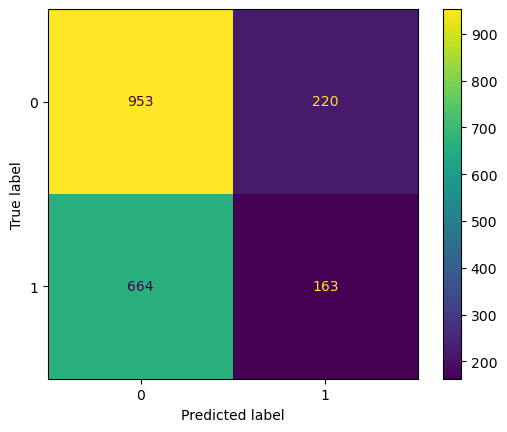

In [31]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(Y_test, Y_pred, labels=mlp.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=mlp.classes_)
disp.plot()
plt.show()